In [197]:
# pip install yfinance

In [198]:
import yfinance as yf

In [199]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [200]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [201]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-06-17,6.940079,6.940079,6.831138,6.907892,418940428
2005-06-20,7.098540,7.122556,6.727890,6.835841,844140229
2005-06-21,7.126766,7.187675,7.055706,7.132461,607560783
2005-06-22,7.162914,7.237688,7.147316,7.172076,420530365
2005-06-23,7.173066,7.299340,7.093588,7.130727,564363474


In [202]:
google_data.shape

(5031, 5)

In [203]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,52.249007,52.789288,51.696182,52.227530,9.832776e+07
std,49.499825,50.041290,48.961112,49.471045,1.234155e+08
min,6.374077,6.669459,6.123017,6.499608,1.584340e+05
25%,13.833859,14.006556,13.645686,13.863447,2.587200e+07
50%,29.541809,29.881957,29.294868,29.602666,4.596585e+07
75%,72.534344,73.306231,71.784545,72.594732,1.219454e+08
max,207.224548,208.212225,203.782599,204.022044,1.650833e+09


In [204]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-06-17 to 2025-06-16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [205]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

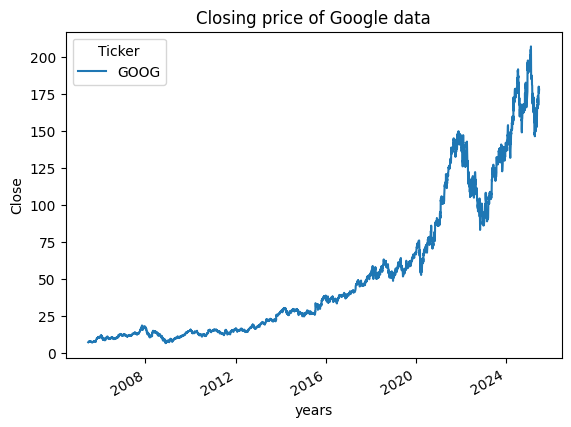

In [207]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [208]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [209]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

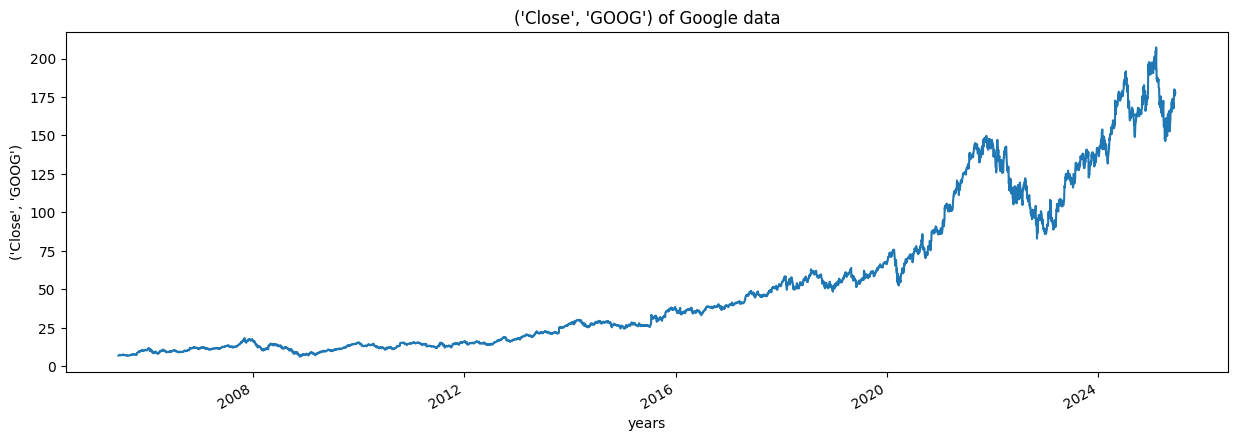

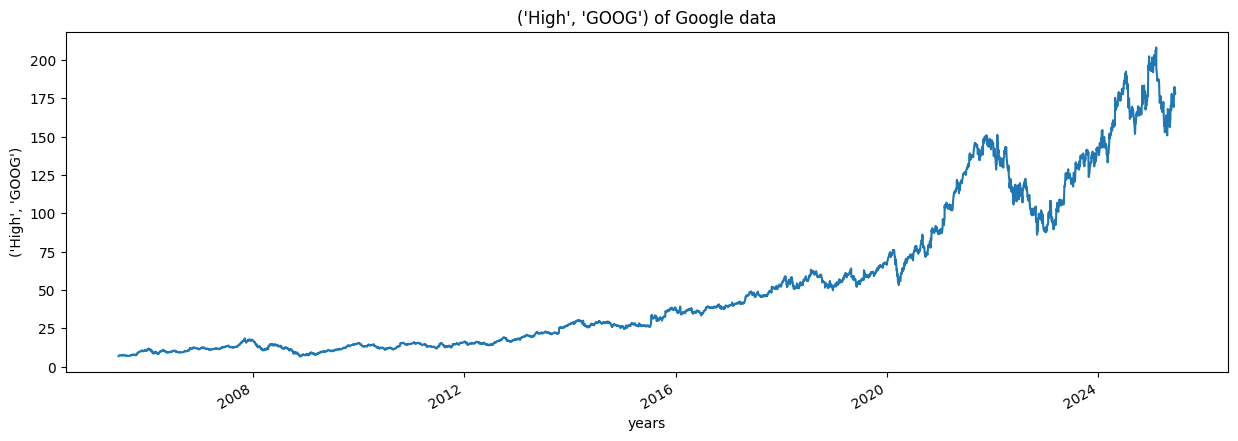

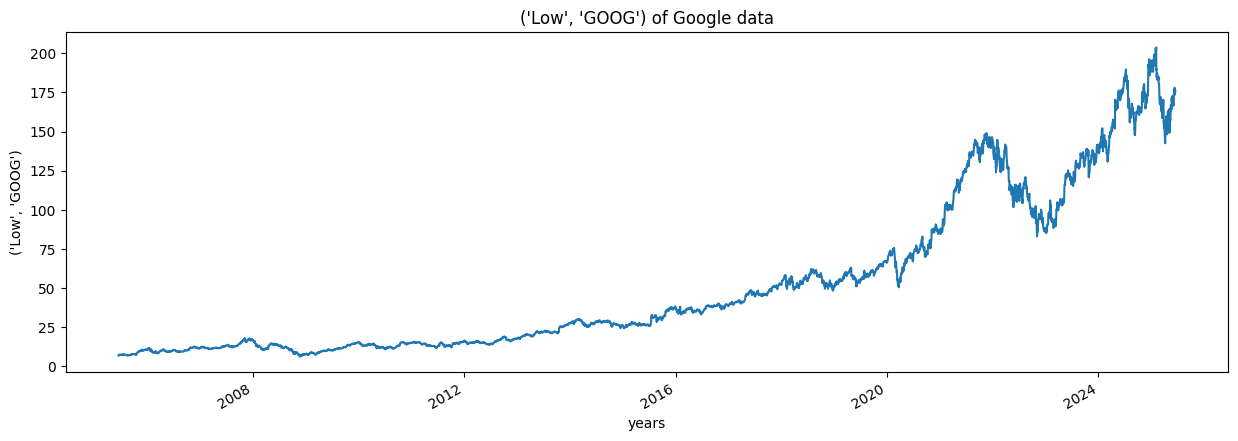

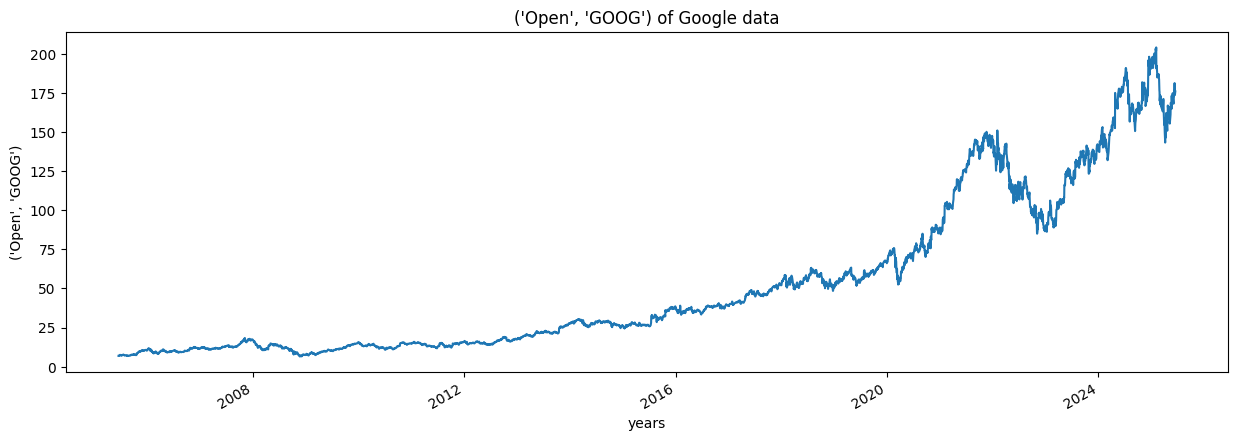

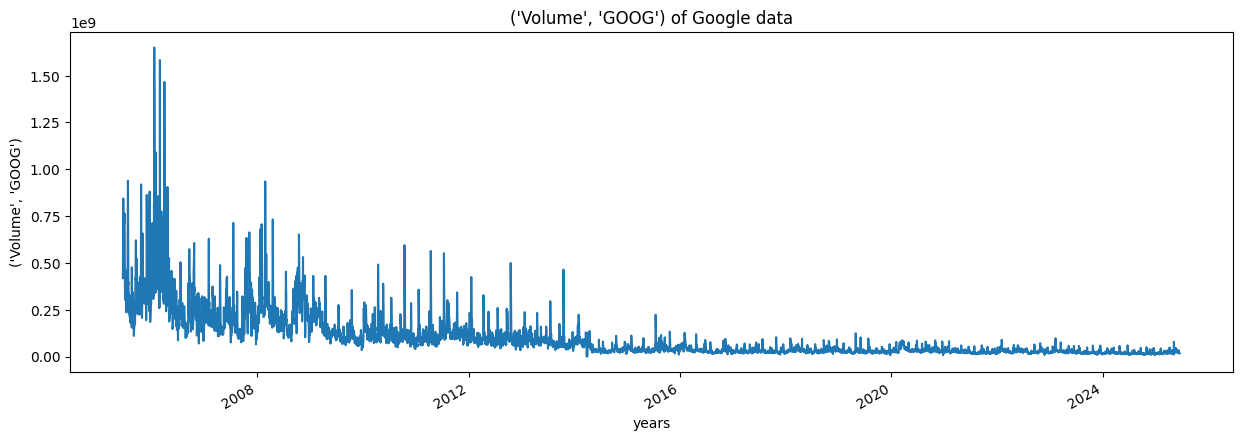

In [210]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [211]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [212]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [213]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [214]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [215]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 137
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [216]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [217]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-06-08         NaN
2006-06-09         NaN
2006-06-12         NaN
2006-06-13         NaN
2006-06-14    8.930949
Name: MA_for_250_days, dtype: float64

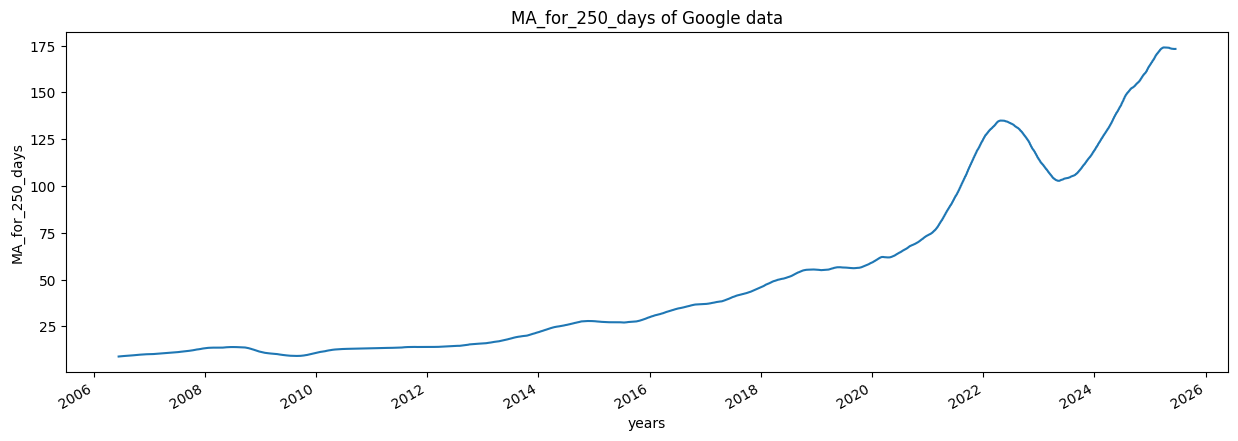

In [218]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

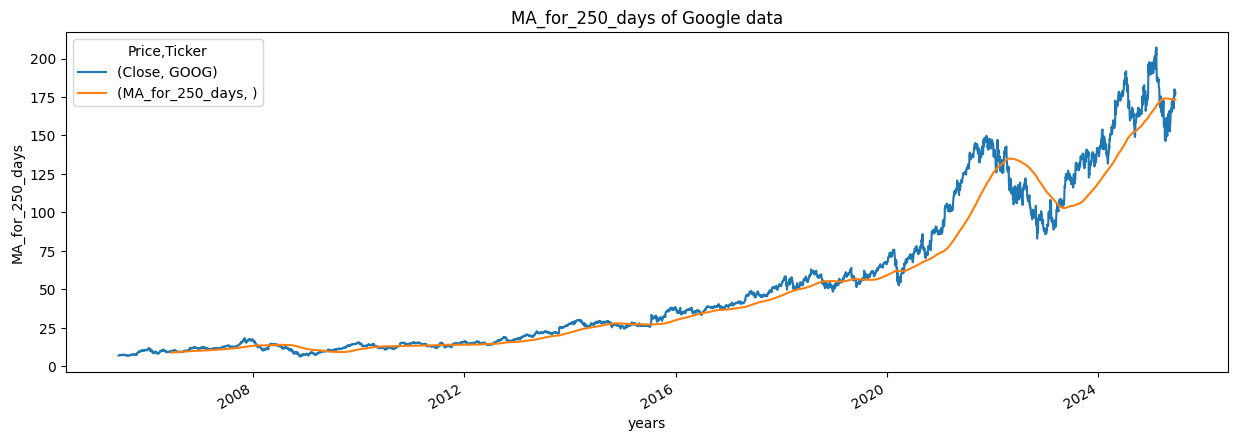

In [219]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

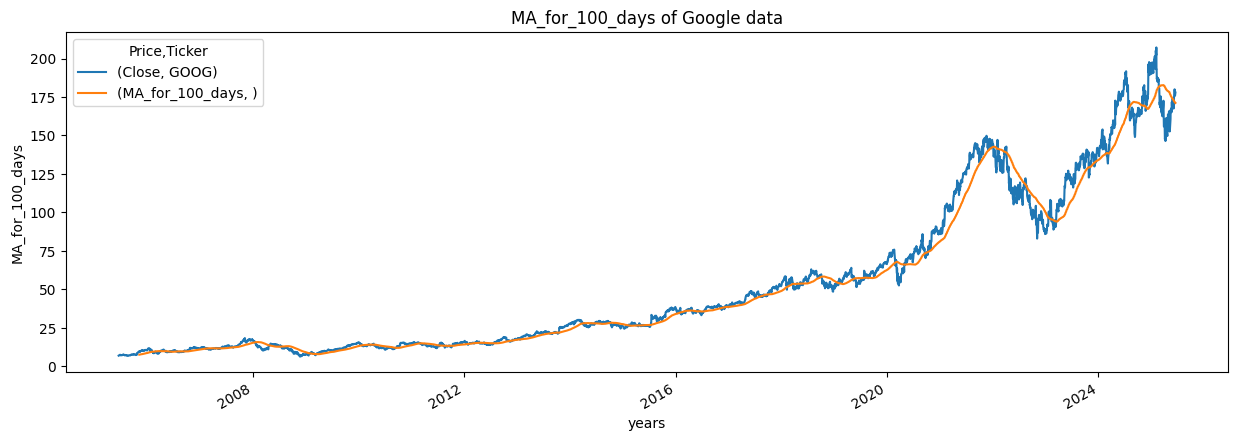

In [220]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

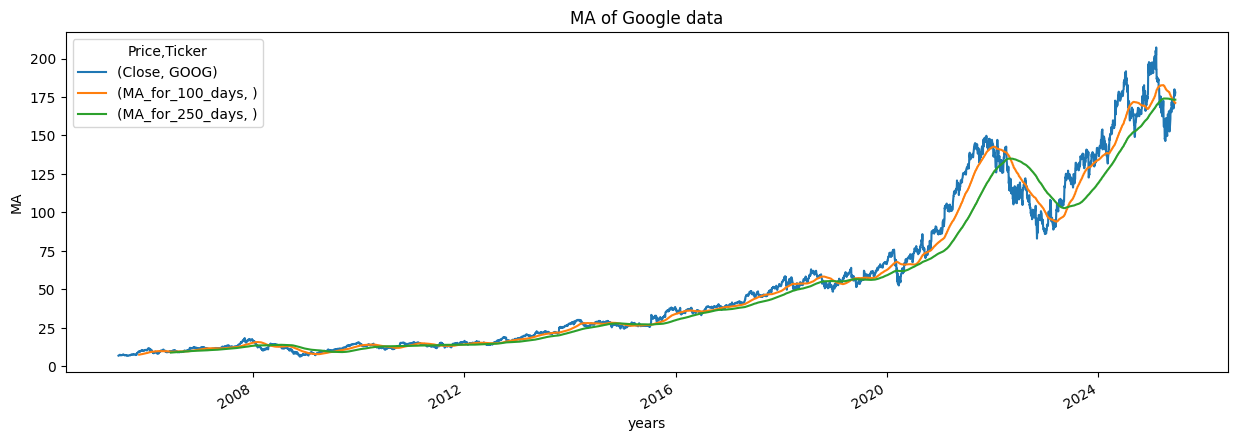

In [221]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [222]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-06-17,6.940079,NaN
2005-06-20,7.098540,0.022833
2005-06-21,7.126766,0.003976
2005-06-22,7.162914,0.005072
2005-06-23,7.173066,0.001417


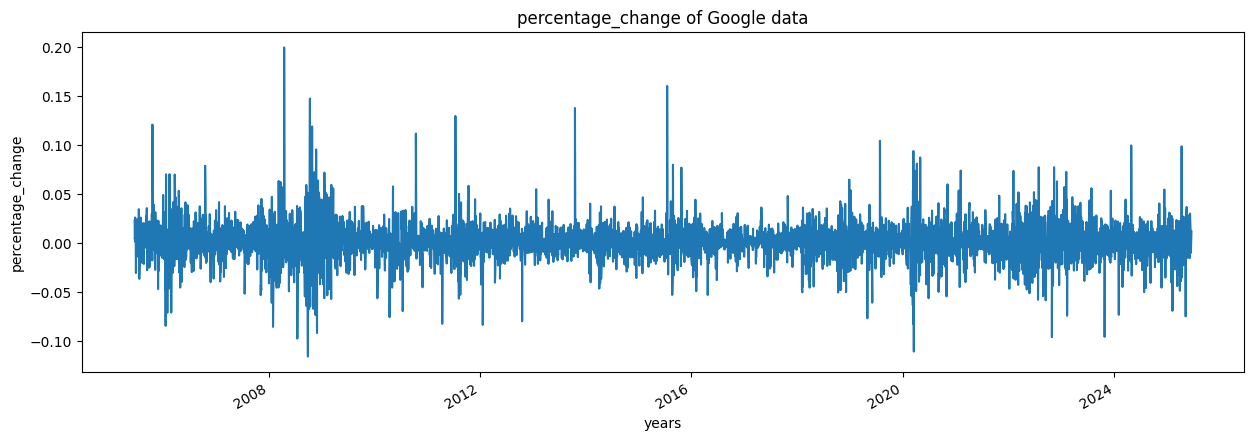

In [223]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [224]:
Adj_close_price = google_data[['Close']]

In [225]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([207.22454834]), array([6.37407684]))

In [226]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00281803],
       [0.00360698],
       [0.00374751],
       ...,
       [0.84936781],
       [0.8439409 ],
       [0.85419728]])

In [227]:
len(scaled_data)

5031

In [228]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [229]:
x_data[0],y_data[0]

(array([[0.00281803],
        [0.00360698],
        [0.00374751],
        [0.00392749],
        [0.00397803],
        [0.00490751],
        [0.00575193],
        [0.00549305],
        [0.00434908],
        [0.00452536],
        [0.00416787],
        [0.00471767],
        [0.00420115],
        [0.00469671],
        [0.00478177],
        [0.00442674],
        [0.00423321],
        [0.00510598],
        [0.00535622],
        [0.00539321],
        [0.0051898 ],
        [0.00646692],
        [0.00672579],
        [0.00696494],
        [0.00554237],
        [0.00473493],
        [0.00476451],
        [0.00486807],
        [0.00444523],
        [0.00373765],
        [0.00421225],
        [0.00514666],
        [0.00491367],
        [0.00496668],
        [0.00430347],
        [0.00416787],
        [0.00420732],
        [0.00348124],
        [0.0032803 ],
        [0.00397926],
        [0.00327414],
        [0.00347754],
        [0.00340974],
        [0.00277981],
        [0.00278105],
        [0

In [230]:

int(len(x_data)*0.7)

3451

In [231]:
4908-100-int(len(x_data)*0.7)

1357

In [232]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [233]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


In [247]:
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D

In [248]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50


C:\Users\Sib Sankar Patra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 8.4372e-04
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 4.0004e-05
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 3.7991e-05
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 4.0016e-05
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 3.8366e-05
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 4.2351e-05
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 3.2464e-05
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 3.0193e-05
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 2.9556e-05
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 2.5809e-05
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 3.6527e-05
Epoch 12/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 2.5069e-05
Epoch 13/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 2.7320e-05
Epoch 14/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 2.8811e-0

In [249]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 98, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 49, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,395 (1.72 MB)

 Trainable params: 150,131 (586.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 300,264 (1.15 MB)

In [250]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [251]:
predictions

array([[0.26483342],
       [0.2775284 ],
       [0.27399436],
       ...,
       [0.803982  ],
       [0.7955599 ],
       [0.7882857 ]], dtype=float32)

In [252]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 59.56599 ],
       [ 62.115784],
       [ 61.40597 ],
       ...,
       [167.85425 ],
       [166.16266 ],
       [164.70163 ]], dtype=float32)

In [253]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 61.6043129 ],
       [ 60.89503098],
       [ 60.47453308],
       ...,
       [176.97000122],
       [175.88000488],
       [177.94000244]])

In [254]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [255]:
rmse

np.float64(6.733813580064952)

In [256]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-07-29,61.604313,59.565990
2019-07-30,60.895031,62.115784
2019-07-31,60.474533,61.405972
2019-08-01,60.093292,59.994808
2019-08-02,59.346733,59.535786


<Figure size 640x480 with 0 Axes>

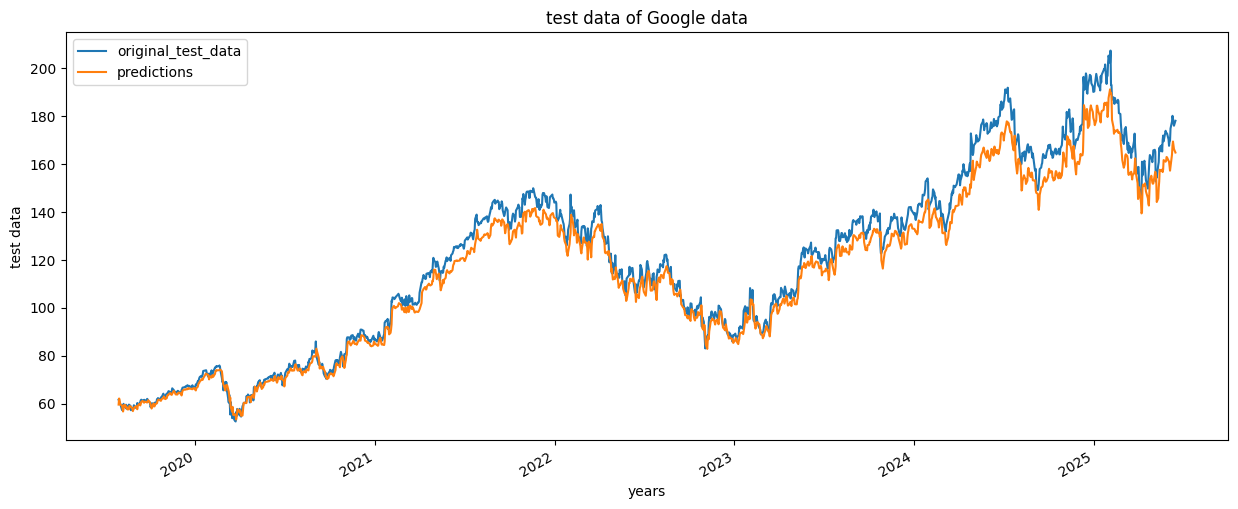

In [257]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

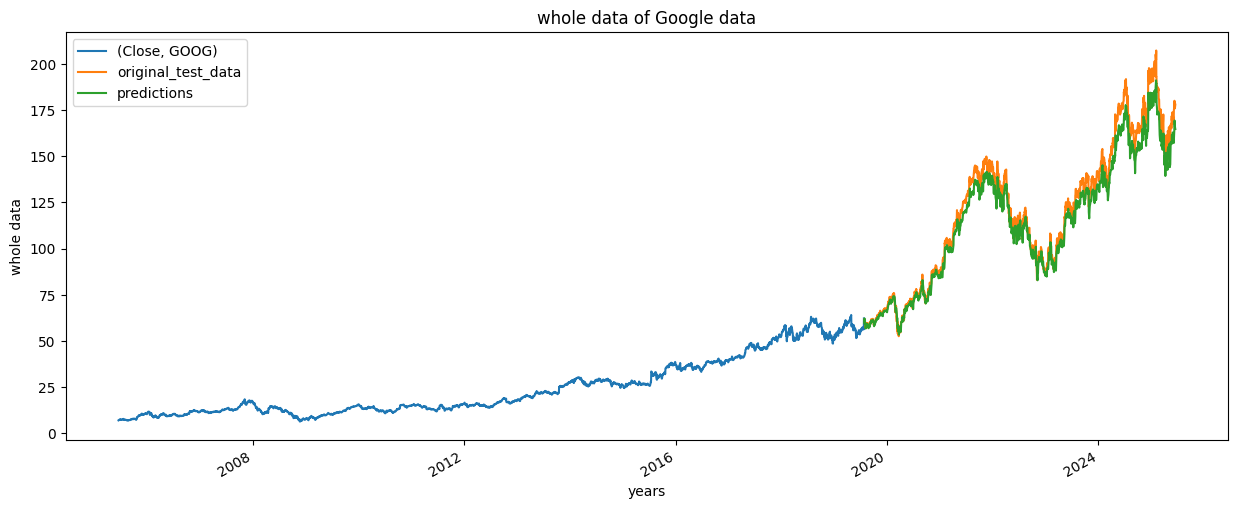

In [258]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [259]:
model.save("Latest_stock_price_model.keras")